#Weak Lensing Maps Demo

##### Spencer Everett, SLAC 2015

First import the necessary code modules.

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# Utilities:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
from pangloss import *

## Convergence maps
Let's create a new `Kappamap` object `K` for a test file located in a data directory created in the local clone of the `Pangloss` repository. Note that as it is not a FITS file, the optional parameter is set to `False`.

In [31]:
K = Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

`Kappamap` is now a subclass of `WLMap` (weak-lensing map), which contains most of the methods used in the previous version of `Kappamap`. As the file is not a fits file, the following parameters are automatically set:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): 'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits'

As part of the constructor, the .kappa file is also converted and saved as a .fits file in the same directory.
Convergence values in the kappa-map are obtained using the `at()` method:

In [32]:
print K.at(0,0), K.at(.002,-.001), K.at(np.deg2rad(1), np.deg2rad(-1))

-0.00794729863992 0.00401836828808 0.0230420597363


Attempting to retrieve convergence values outside of the map always results in a return of `None` (to enable error handling).

In [33]:
print K.at(0,np.pi)

None


A `Kappamap` object can also plot itself using the `plot()` method.

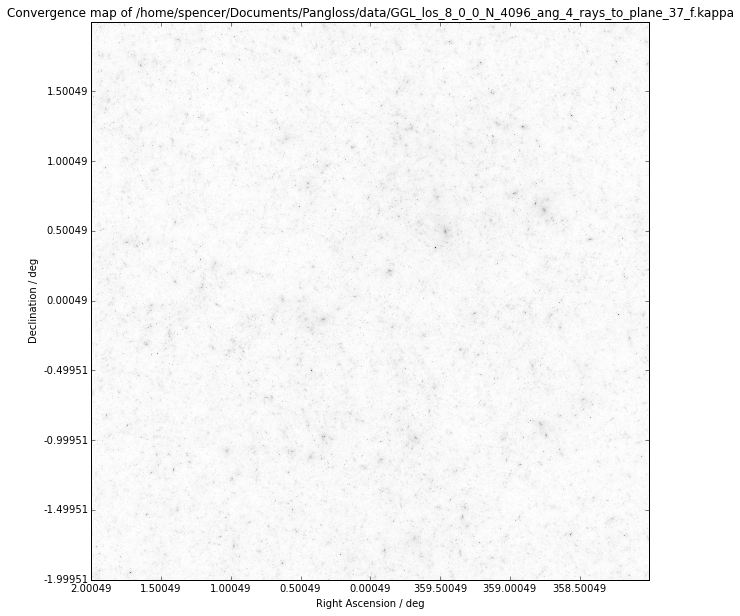

In [34]:
K.plot()

The size of the plot can be changed using the first optional argument `fig_size`, where the value is in inches. The default size is 10 in.

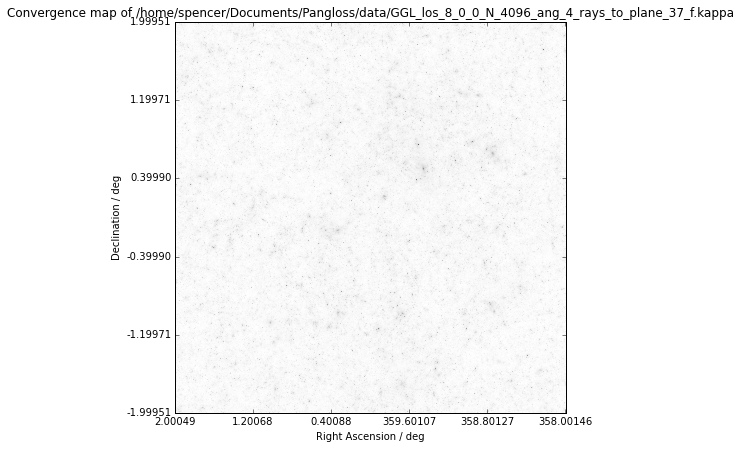

In [35]:
K.plot(7)

The plot method can also be used to graph a subplot. Simply add a list parameter of the form:

    subplot = [xmin,xmax,ymin,ymax]

where each the subplot limits are in image (pixel) coordinates:

    K.plot(10,[2049,4096,0,2048])

For a much more zoomed in picture:

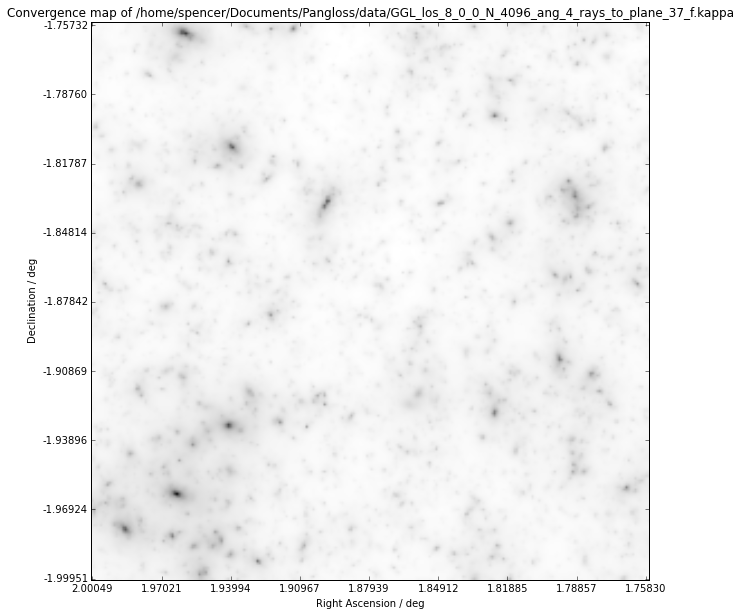

In [36]:
K.plot(10,[0,250,0,250])

Alternatively, the subplot bounds can be passed with physical coordinates using the final optional argument `coords`. By default, `coords` is set to 'pixel' rather than 'physical'.

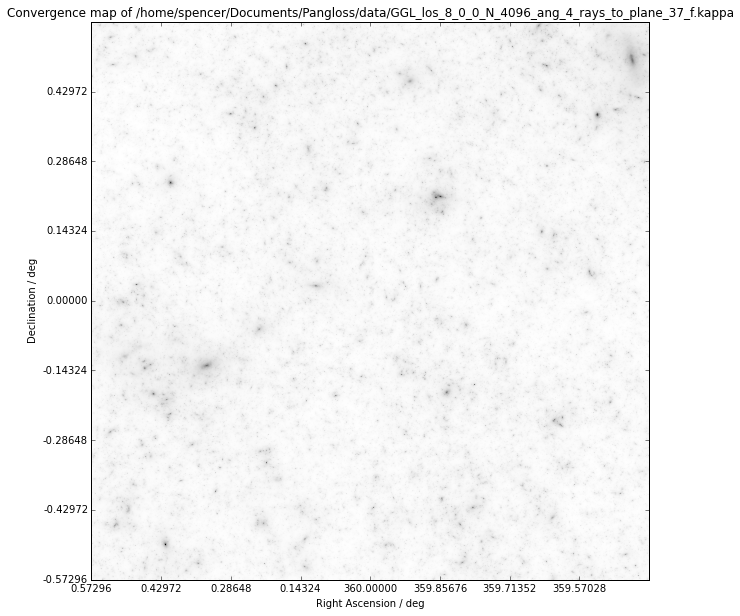

In [37]:
K.plot(10,[-.01,.01,-.01,.01],coords='physical')

Finally, while the original map itself is square (4096 x 4096 pixels) the subimage does not need to be square.

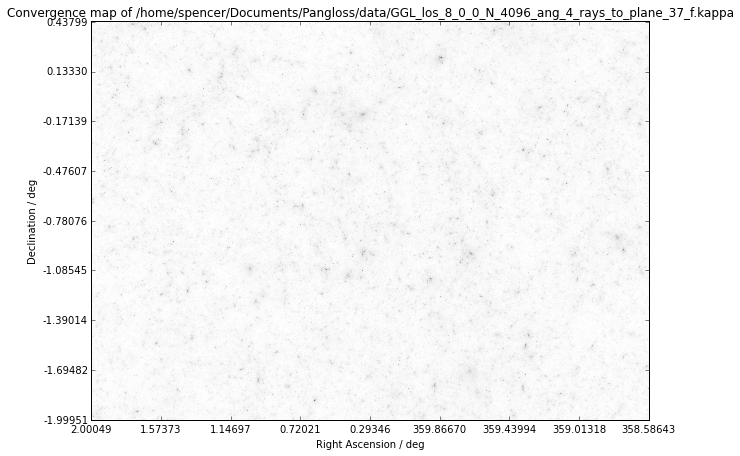

In [38]:
K.plot(10,[0,3500,0,2500])

## Shear maps
We can also create a `Shearmap` object. Like `Kappamap`, the `Shearmap` class is a subclass of `WLMap` but requires two file inputs; one file for each component of the complex shear. The files $\textit{must}$ be passed in a list (unlike `Kappamap` files, which are automatically converted) and must be in order (first the .gamma1 file, then the .gamma2 file). As before, the optional second argument is set to `FITS = False` as the file has yet to be converted to FITS format.

In [39]:
S = Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

A `Shearmap` object is currently two separate maps: gamma1 and gamma2. Each map attribute is now stored as a list, with the first and second entry corresponding to gamma1 and gamma2. (We could maybe change this - do we really need two versions of the same data?) For example, 

In [40]:
print S.values[0] # The shearmap values for the gamma1 map

[[  5.60115930e-03   6.39436534e-03   6.40015723e-03 ...,  -2.20925122e-05
   -8.27380689e-04   1.34383084e-03]
 [ -1.57251168e-04   1.87345629e-03   2.25435290e-03 ...,  -3.09474417e-03
   -4.20970842e-03  -9.02319269e-04]
 [ -3.86622665e-03  -1.28266669e-03   2.61628738e-04 ...,  -5.16812131e-03
   -7.13164080e-03  -2.03410280e-03]
 ..., 
 [  3.13768983e-02   3.53595652e-02   3.44255455e-02 ...,  -5.15447231e-03
    1.02778722e-03  -1.44818809e-03]
 [  3.02359760e-02   3.53406854e-02   3.70858125e-02 ...,  -8.09114368e-04
    2.33800570e-03  -1.16832973e-03]
 [  2.70190202e-02   2.80189943e-02   1.89315286e-02 ...,  -3.63504468e-03
    1.03648286e-03   2.06721551e-03]]


In [41]:
S.values[1] # The shearmap values for the gamma2 map

array([[-0.04114537, -0.03823771, -0.03450574, ..., -0.00924038,
        -0.00435786,  0.00041931],
       [-0.04342448, -0.03918865, -0.03567995, ..., -0.01350109,
        -0.00570752,  0.00086826],
       [-0.04252999, -0.03922154, -0.03604227, ..., -0.01565584,
        -0.00725669,  0.00176763],
       ..., 
       [ 0.00355339, -0.00443153, -0.02298716, ..., -0.00507053,
        -0.00907261, -0.01196655],
       [ 0.01031568,  0.01171172,  0.01396914, ..., -0.01014063,
        -0.01085359, -0.01317145],
       [ 0.01468208,  0.0207901 ,  0.03035841, ..., -0.01330485,
        -0.01293556, -0.01289561]], dtype=float32)

If the files have .gamma1 and .gamma2 extensions, the attributes are set automatically in `WLMap`. A few of the important attributes set for the maps are:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): ['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits',
'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits']

The `at()` method works similarly for a `Shearmap`, but a third argument now specifies which map (gamma1 or gamma2) the method will extract from.

In [42]:
print S.at(0,0,0) # gamma1 value at (0,0)

-0.0556413074955


In [43]:
print S.at(0,0,1) # gamma2 value at (0,0)

-0.00337005825713


Note that if no third argument is passed, the method returns `None` (to avoid confusion).

In [44]:
print S.at(0,0)

None


The `plot()` method for a `Shearmap` is quite different. (Explain details and small derivation of complex gamma, etc).

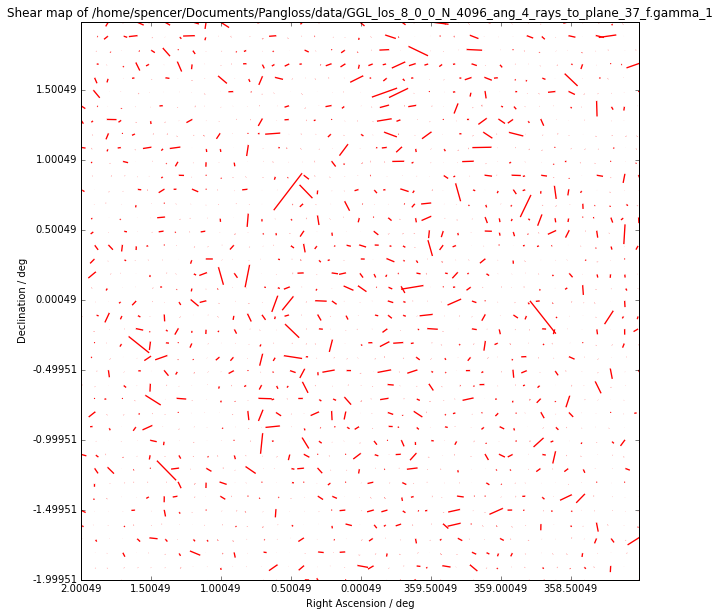

In [45]:
S.plot()

Resizing the image is the same as with `Kappamap`, simply pass one argument with the desired figure size in inches.

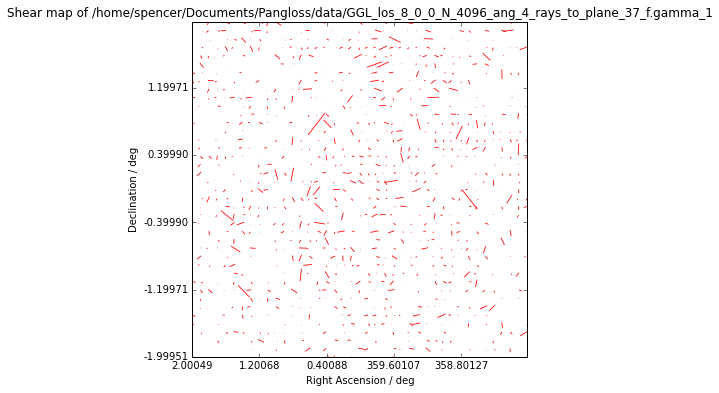

In [46]:
S.plot(6)

Subplots also work with `Shearmaps`. Note that the shear stick sampling for the subplot is adjusted so that the shear stick density remains the same regardless of size (40 sticks per axis).

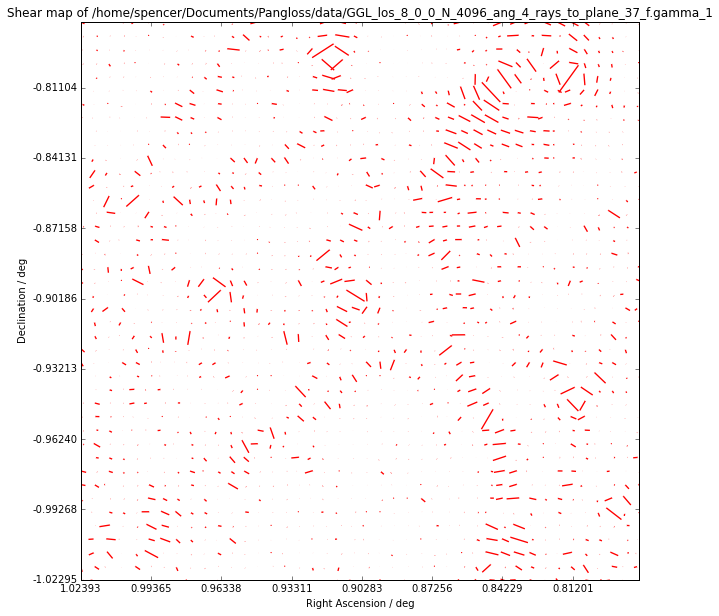

In [47]:
S.plot(10,[1000,1250,1000,1250])

Physical coordinates can also be inputted instead of pixel numbers by adding the optional argument 'physical'. This parameter is set to 'pixel' by default.

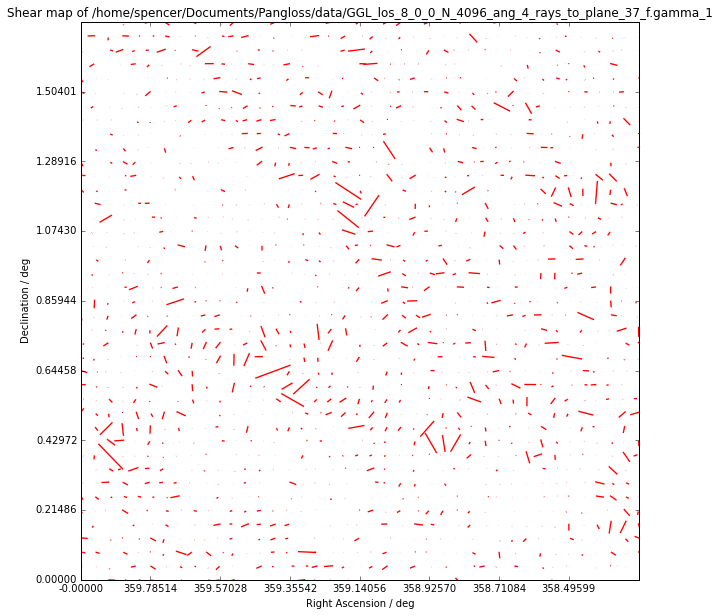

In [48]:
S.plot(10,[0,.03,0,.03],coords='physical')

When the subplot is not square, the sampling of shear sticks is held constant rather than the number of sticks so that the image is not distorted.

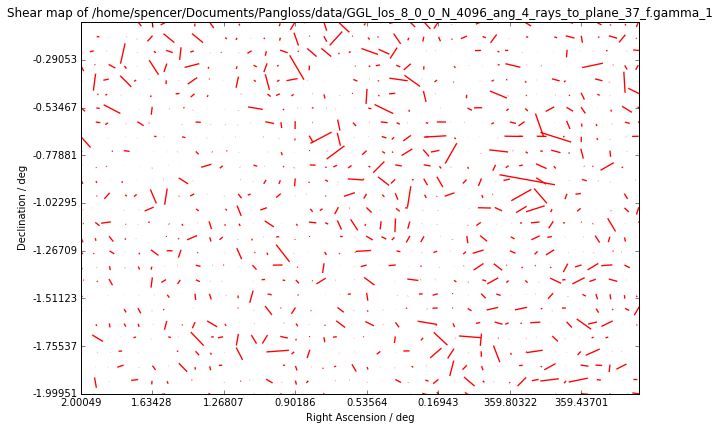

In [49]:
S.plot(10,[0,3000,0,2000])

However, the size of the sticks still seems dependent on the size of the x-axis. This makes subplots with a larger y-axis harder to view as seen below. Need to look further into numpy.quiver() to determine how to resolve this.

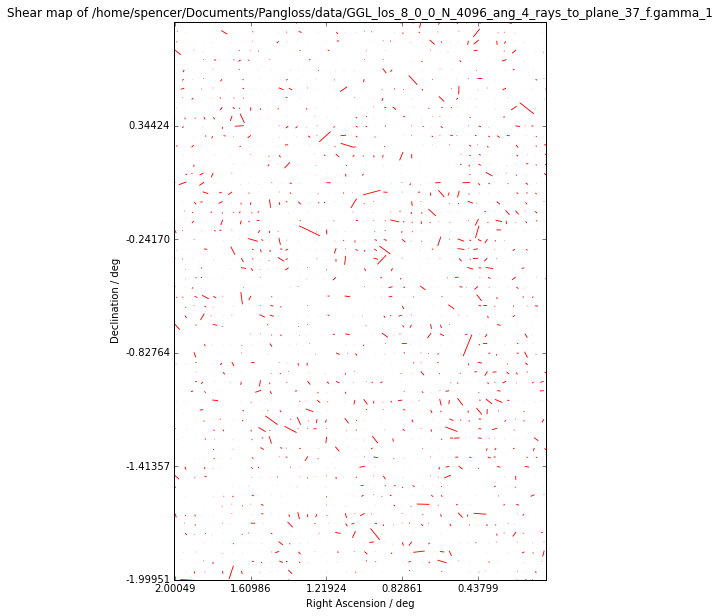

In [50]:
S.plot(10,[0,2000,0,3000])

## Overlaying shear and convergence

The plotting methods simply use the current axes, allowing simple overlays to be made:   

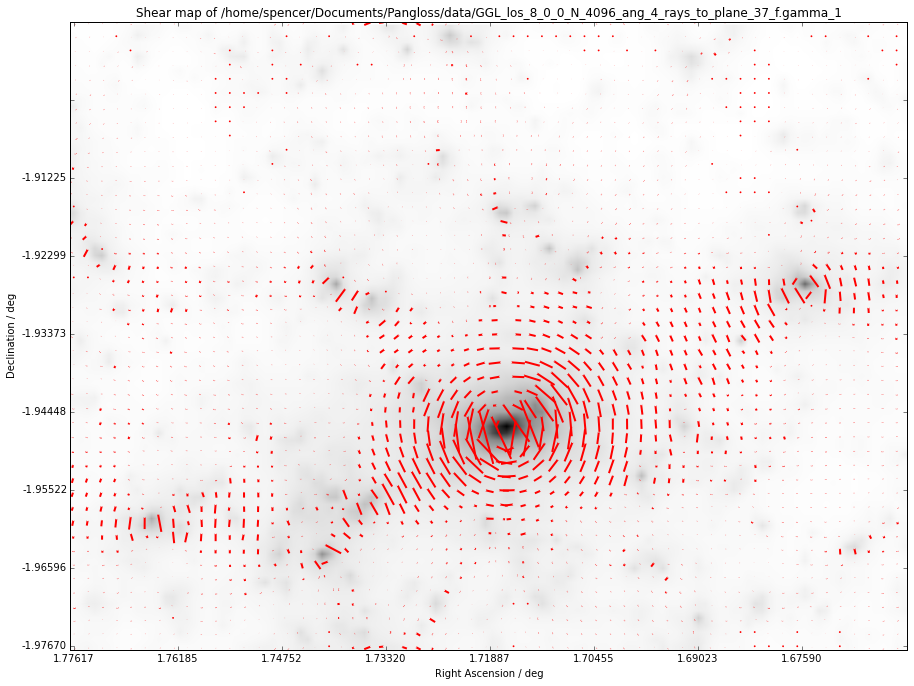

In [51]:
K.plot(15,[-.031,-.029,-.0345,-.033],coords='physical')
S.plot(15,[-.031,-.029,-.0345,-.033],coords='physical')

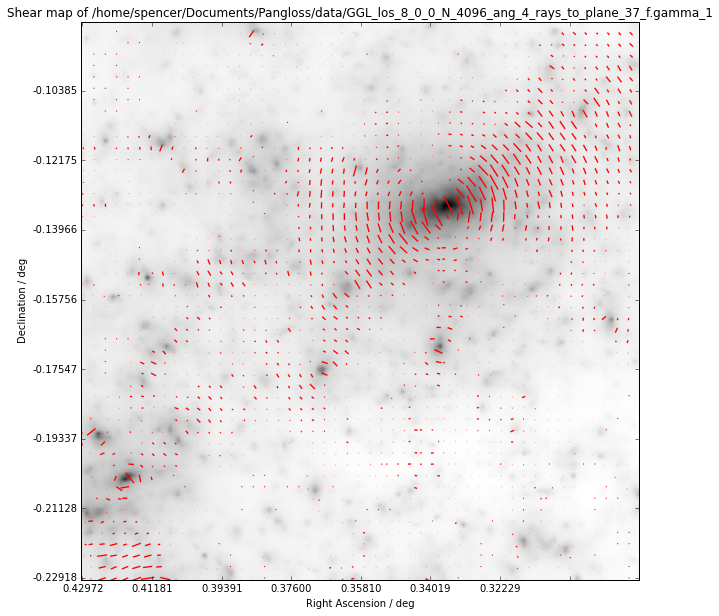

In [52]:
K.plot(10,[-.0075,-.005,-.004,-.0015],coords='physical')
S.plot(10,[-.0075,-.005,-.004,-.0015],coords='physical')